# number plate detection

In [7]:
from matplotlib import pyplot as plt
import argparse
import cv2

In [8]:
def plt_imshow(title, image):
   image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
   plt.imshow(image)
   plt.title(title)
   plt.grid(False)
   plt.show()

In [19]:
import easyocr
import imutils

In [2]:
pip install easyocr

  Using cached easyocr-1.4.1-py3-none-any.whl (63.6 MB)
  Using cached torchvision-0.10.1-cp38-cp38-win_amd64.whl (936 kB)
  Using cached opencv_python_headless-4.5.3.56-cp38-cp38-win_amd64.whl (34.8 MB)
  Using cached python_bidi-0.4.2-py2.py3-none-any.whl (30 kB)
  Using cached torch-1.9.1-cp38-cp38-win_amd64.whl (222.1 MB)
Note: you may need to restart the kernel to use updated packages.


In [20]:
import easyocr
import imutils

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

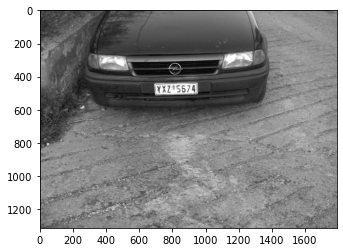

In [65]:
gray_image=cv2.imread("lp2.JPG",0)
plt.imshow(cv2.cvtColor(gray_image,cv2.COLOR_BGR2RGB))

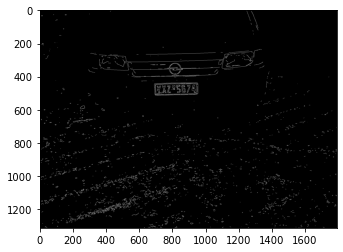

In [67]:
filter=cv2.bilateralFilter(gray_image,11,17,17)
edge_img=cv2.Canny(filter,160,200)
plt.imshow(cv2.cvtColor(edge_img,cv2.COLOR_BGR2RGB))

In [68]:
rectangle=cv2.findContours(edge_img.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
points=imutils.grab_contours(rectangle)
points=sorted(points,key=cv2.contourArea,reverse=True)[:10]

In [69]:
rog=None
for i in points:
  check=cv2.approxPolyDP(i,10,True)
  if len(check)==4:
    rog=check
    break

In [70]:
rog

array([[[953, 444]],

       [[694, 442]],

       [[693, 510]],

       [[945, 507]]], dtype=int32)

In [71]:
mask=np.zeros(gray_image.shape,np.uint8)
new_img=cv2.drawContours(mask,[rog],0,255,-1)
new_img=cv2.bitwise_and(gray_image,gray_image,mask=mask)

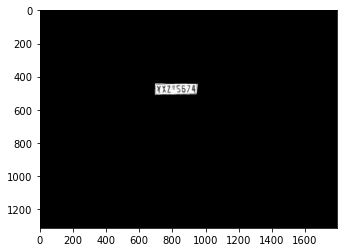

In [72]:
plt.imshow(cv2.cvtColor(new_img,cv2.COLOR_BGR2RGB))